**Assignment 3: Clustering**
---
**Group 6:**

Name | Contribution 
--- | ---
1. Himanshu Chuphal (guschuhi@student.gu.se) | 10 H
2. Claudio Aguilar Aguilar(claagu@student.chalmers.se) | 10 H

---

In [1]:
#imported python modules
import pandas as pd
import matplotlib.pyplot as plt 
import statistics as stats
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

# Question 1

In [2]:
# read the data file - data_assignment2.csv
url = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a3/data_all.csv'
data = pd.read_csv(url)
#Describe the data
data.describe()
data.columns.tolist()
print(data.head())

  residue name  position chain         phi         psi
0          LYS        10     A -149.312855  142.657714
1          PRO        11     A  -44.283210  136.002076
2          LYS        12     A -119.972621 -168.705263
3          LEU        13     A -135.317212  137.143523
4          LEU        14     A -104.851467   95.928520


# Question 1

**1. Show the distribution of phi and psi combinations using:**

**a.   A scatter plot**


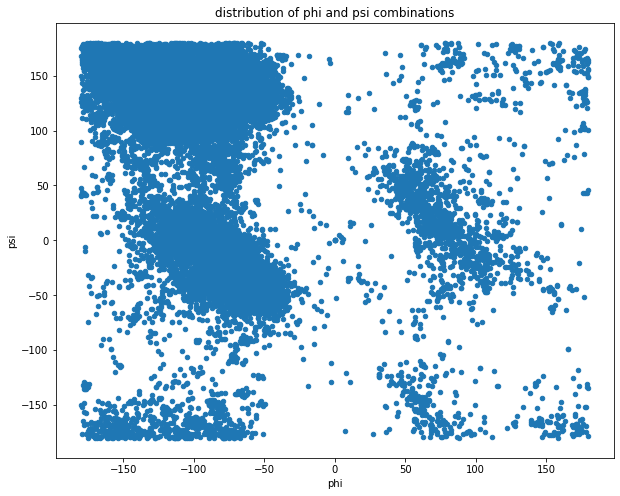

In [3]:
data_phi_psi = data[['phi',
                     'psi']]
data_phi_psi.plot.scatter('phi', 
                          'psi',
                          title='distribution of phi and psi combinations',
                          figsize=(10, 8))
plt.show()

**b.   A heatmap** 


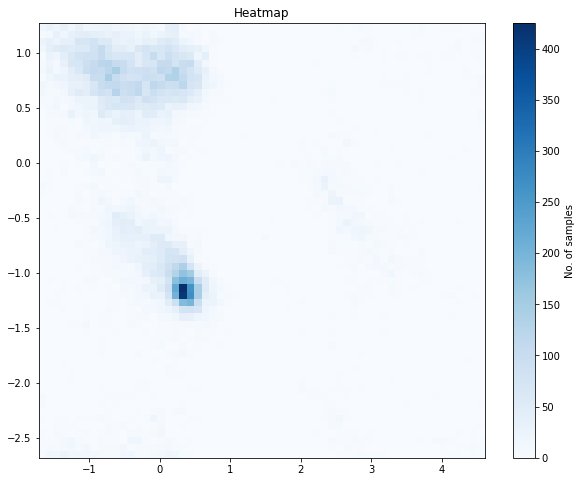

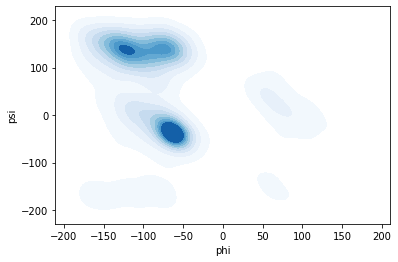

In [4]:
data_phi_psi = data[['phi',
                     'psi']] # including all of the data
data_x = StandardScaler().fit_transform(data_phi_psi)
plt.figure(figsize=(10, 8))
#2D histogram
plt.hist2d(data_x[:,0],
           data_x[:,1],
           bins=60, 
           cmap='Blues')
cb = plt.colorbar()
cb.set_label('No. of samples')
plt.title('Heatmap')
plt.show()
# 2nd way of getting the heatmap
sns.kdeplot(x=data['phi'], y=data['psi'], cmap="Blues", shade=True)
plt.show()

Thanks to the heatmap we can now see which regions are more dense.

# Question 2

- **Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.**

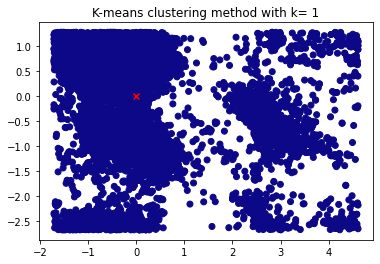

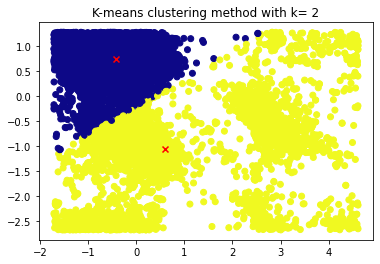

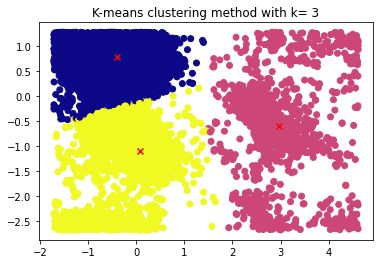

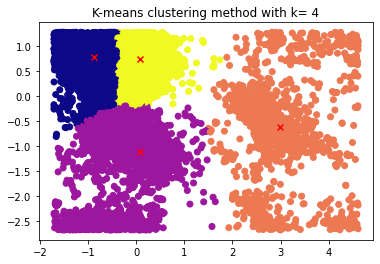

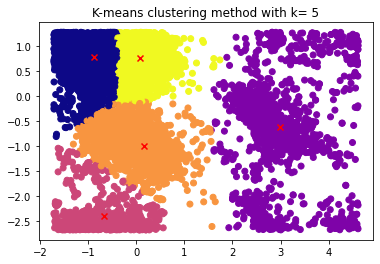

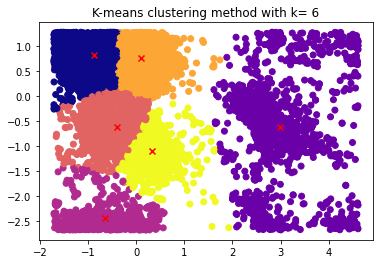

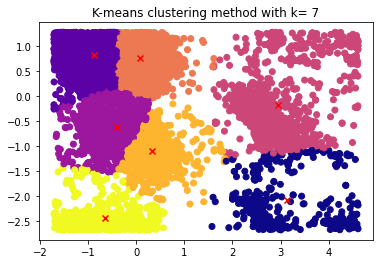

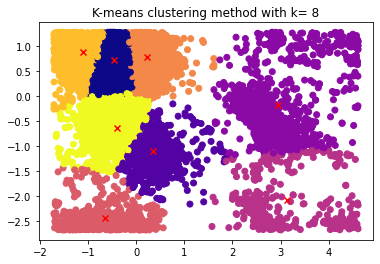

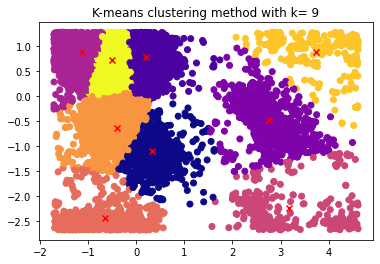

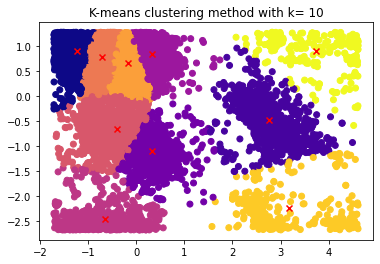

In [5]:
data_phi_psi = data[['phi',
                     'psi']]
# taking 10 'k' values to experiment from 1-10
k_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data_x = StandardScaler().fit_transform(data_phi_psi)
#loop for range
for k in k_range:
    k_means = KMeans(n_clusters=k,
                     random_state=0).fit(data_x)
    y_k_means = k_means.predict(data_x)
    plt.scatter(data_x[:,0], data_x[:,1],c=y_k_means, cmap='plasma') 
    plt.title('K-means clustering method with k= {0}'.
              format(k))
    plt.scatter(k_means.cluster_centers_[:, 0],
                k_means.cluster_centers_[:, 1],
                marker='x',
                c='red')
    plt.show()

Initial centroids are randomly selected each time by the algorithm, so the results can vary. By looking at the various plots above :

**k=3** : separates clusters and combines all the data-points on the right side of the graph into one cluster.

**k=4** :  adds a new cluster but splits the upper left of the graph into 2 clusters

**k=6** : adds new clusters and  also, the middle left cluster shifts into an additional cluster

**k=8** : splits the upper left of the graph into an additional cluster.

and so on, but we think that the most appropriate k-value ( using k-means algorithm) seems to be **k=3** because it resembles the way that we would've clustered it, if it was up to us.

But based on initial viewpoint by just looking at the scatter plot in **1.a)**, we discussed it to be 4 clusters or maybe 6 (bylooking at the scattered data points).

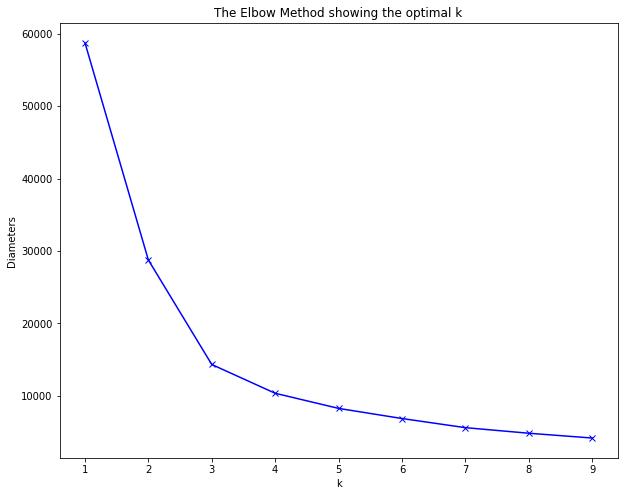

In [6]:
#Elbow method which matematically tells us which k-mean value its the most appropriate.
#diameters: calculated as the average of the squared distances from the cluster centers
#inertia: the sum of squared distances of samples to their closest cluster center
diameters = []
K_range = range(1,10)
for k in K_range:
    k_means = KMeans(n_clusters=k, random_state=0).fit(data_x)
    diameters.append(k_means.inertia_)
plt.figure(figsize=(10,8))
plt.plot(K_range, diameters, 'bx-')
plt.xlabel('k')
plt.ylabel('Diameters')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**a.   Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.**

The elbow method on the other hand, which mathematically compares longest distance(diameter) between two points of the same color also supports our suggestion, which makes it more justifiable that the most optimal k-value is 3. 

**c.    Do the clusters found in part (a) seem reasonable?**

By looking at the scatterplot in **1.a)**,  for all the data points, it is not super clear on the reasonable amount of clusters we can form.

Based on our obervations from the scatter plot, we initially decided for 4 clusters (2 on the left side and 2 on the right side of the graph), We think that the computer/algorithm does a great job for **k=3**, but then after that for **K>3**, the algorithm did a poor job and we feel that it slips and does not resemble what we envision in our mind (based on our initial discussion by just looking at the scatter plot data points) and splits the data too excessively.


**d.	Can you change (transform the represenation of) the data to get better results (or the same results in a simpler way)? This is a tricky question which requires some thinking and creativity. (Hint: since both phi and psi are periodic attributes, you can think of shifting/translating them by some value and then use the modulo operation.)**

- The angles in the data go from (-180, 180) degrees. These 2 are the same angles and thereby is the same data, we could only keep one of the values.
- Just to avoid using negavtive angles, we translated the interval (-180, 180) to (0, 360) range (rotated on cycle)
- a lot of data at the edges of the clusters here
- **Original data**:phi angles (-180, 180) and  psi angels:(-180, 180)
- **Simplified data** ** (after shifting/translating )* : phi angles (0, 360) and psi angles :(150, 510) with a shift of 150 degrees (it can be any offset value but we decided to offset psi with 150 to get a better scatter plot)

The shifted data point with the new axis will create an another way to plot the data-points and possibly find new clusters.

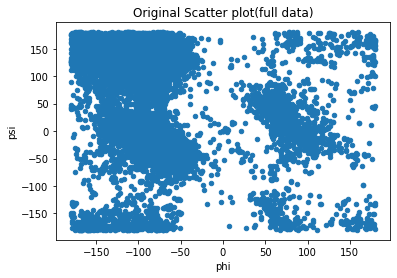

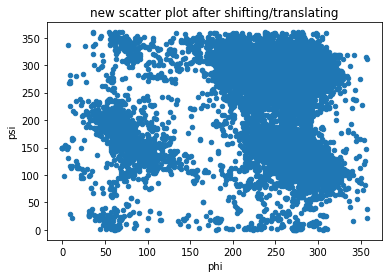

In [7]:
# scatter plot with the original data
data_phi_psi = data[['phi',
                     'psi']]
data_phi_psi.plot.scatter('phi', 
                          'psi',
                          title='Original Scatter plot(full data)')
plt.show()
# merge the data for simpilied data - rotated on cycle
# new columns with offset of 150 degrees to avoid dats close to the borders  
data['phi_360'] = data.apply(lambda row: ((row['phi'] + 360) %360),
                             axis=1)
data['psi_360'] = data.apply(lambda row: ((row['psi'] + 150) %360),
                             axis=1)
# scatter plot with the original data after shifting/translating
data.plot.scatter('phi_360',
                'psi_360',
                title='new scatter plot after shifting/translating')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

- Checking k-means for the shifted data points.
for **k= 4 :** The algorithm split the cluster in the upper right corner  instead of upper left corner, so plot again with the previously selected k value (k=3):

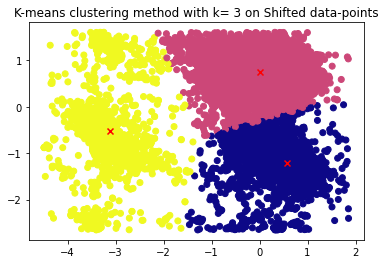

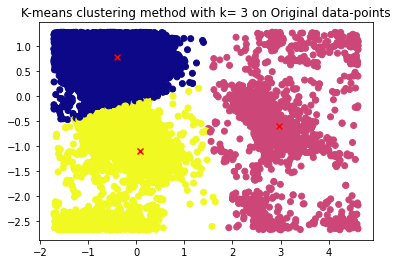

In [8]:
k=3
data_phi_psi = data[['phi_360',
                     'psi_360']]
data_x = StandardScaler().fit_transform(data_phi_psi)
k_means = KMeans(n_clusters=k,
                     random_state=0).fit(data_x)
y_k_means = k_means.predict(data_x)
plt.scatter(data_x[:,0], data_x[:,1],c=y_k_means, cmap='plasma') 
plt.title('K-means clustering method with k= {0} on Shifted data-points'.
              format(k))
plt.scatter(k_means.cluster_centers_[:, 0],
                k_means.cluster_centers_[:, 1],
                marker='x',
                c='red')
plt.show()
# original data
data_phi_psi = data[['phi',
                     'psi']]
data_x = StandardScaler().fit_transform(data_phi_psi)
k_means = KMeans(n_clusters=3,
                     random_state=0).fit(data_x)
y_k_means = k_means.predict(data_x)
plt.scatter(data_x[:,0], data_x[:,1],c=y_k_means, cmap='plasma') 
plt.title('K-means clustering method with k= {0} on Original data-points'.
              format(k))
plt.scatter(k_means.cluster_centers_[:, 0],
                k_means.cluster_centers_[:, 1],
                marker='x',
                c='red')
plt.show()

#Question 3

- **Use the DBSCAN method to cluster the phi and psi angle combinations in the data file**

In [9]:
#imported python modules
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

- For DBSCAN, It's tricky to get the initial esp and min_samples values, so we decided to start with default values which are eps_default=0.5 min_samples_default=5 and but we got just one cluster which seems not reasonable enough and the reason we think is data set is huge.

- As these default values seems to be very low for our big data set,for simplicity,  we did experiment manually to come up with an optimezed value of eps and min_sample

- eps: is the neighborhood around a data point, if the distance between two data-points is lower or equal to eps value then they are considered as neighbors

- min_samples: is the he minimum number of neighbors a given point should have in order to be classified as a core point

Estimated number of clusters: 4
Estimated number of noise points: 170


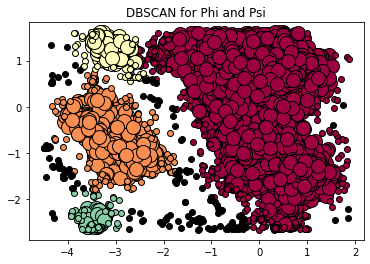

In [10]:
data_phi_psi = data[['phi_360',
                     'psi_360']]
#based on our experiments
eps=0.45
min_samples=90
#make_blobs : Generate isotropic Gaussian blobs for clustering        
X, labels_true = make_blobs(n_samples=len(data_phi_psi),
                            centers=data_phi_psi,
                            cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#number of clusters in labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)
#Plot the result
#noise in black color
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title("DBSCAN for Phi and Psi")
plt.show()

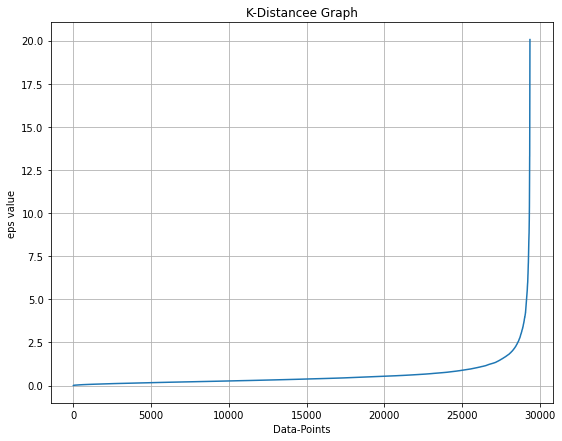

In [11]:
from sklearn.neighbors import NearestNeighbors
data_phi_psi = data[['phi_360',
                     'psi_360']]
#To find the optimal epsilon and min_samples values
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(data_phi_psi)
distances, indices = neighbors_fit.kneighbors(data_phi_psi)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig, axis = plt.subplots(figsize = (9,7))
plt.plot(distances)
plt.grid()
#zoom in to be able to see where the "elbow" is located.
#plt.axis([29200, 30000, 0, 20])
plt.title("K-Distancee Graph")
axis.set_xlabel("Data-Points")
axis.set_ylabel("eps value")
plt.show()
#elbow located in x-axis = 29368.0 -> eps=around 2.5

We used the suggested eps value from the k-distance graph, but for some reasons it didn't fit well and gave just one cluster for all the data points so we decided to go with the value manually experimented value.

**a.	Motivate:** 

**i).	the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point, and** 


There is no optimal way to determine the min_samples value. The value is based on the problem we are trying to solve. We tried following experiments:

*   the larger data set -> the larger min_samples value
*   if data noisier, we choose a larger value for min_samples
*   min_samples = 2*dimension of the data set
*   min_samples = log(total nr of points)

The different suggestions gave us far too low min_samples values to a data set of this magtnitude.

So what we instead did is that we tested different values manually according to the amount of noise and clusters that we liked and ended up with the value 90.

**ii.	the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”). Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers.**

Same applies here, there is no certain algorithm that determines the best value for epsilon.
There exists some suggestions but nothing that is certified. One of the suggestion is to use a k-distance graph which is a technique that calculates the average distance between each data point and its k nearest neighbors, where k=min_samples value, which in our case is 90.

The epsilon value is found the same way we found the optimal k-value for k-means in question 2, by looking where the graph has the greatest slope, which in our case is at around 9.

But as we mentioned earlier, we instead tested different values manually according to the amount of noise and clusters that we liked and ended up with the epsilon value 0.45.

170 outliers are found in our DBSCAN which is stated in the code for question 3 as a print.

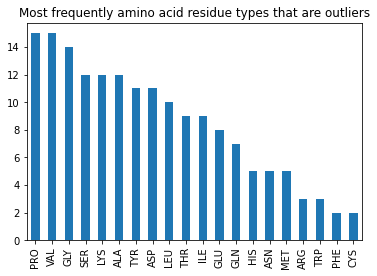

In [12]:
#list the sample values, 0=core point , -1=outlier 
sample_values = list(labels)
data['sample values'] = sample_values # create a column for each rows corresponding sample value
#save all the rows where the value = -1 -> outliers
outliers_rows = data.loc[data['sample values'].isin([-1])]
#count the number of occurence of each residue name
residue_names_outliers       = outliers_rows['residue name']
residue_names_outliers_count = outliers_rows['residue name'].value_counts()

bar_plot = residue_names_outliers_count.plot.bar()
bar_plot.set_title('Most frequently amino acid residue types that are outliers')
plt.show()

**b.	Compare the clusters found by DBSCAN with those found using K-means**

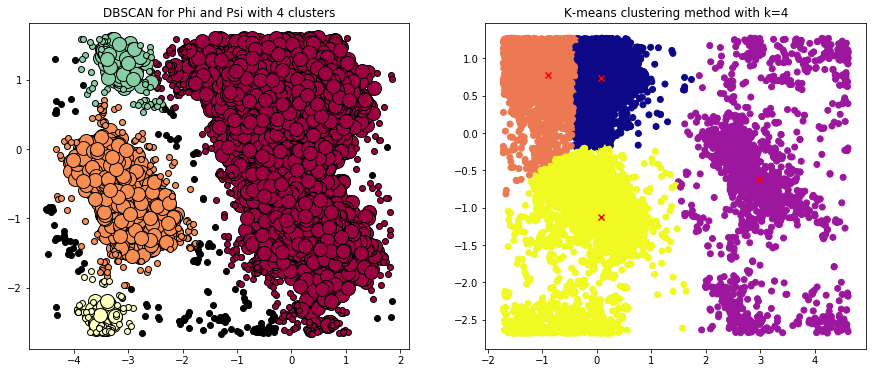

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))        
X, labels_true = make_blobs(n_samples=len(data_phi_psi),
                            centers=data_phi_psi)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.45, min_samples=90).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#number of clusters in labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
#Plot the result
#noise in black color
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    ax1.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    ax1.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
ax1.set_title("DBSCAN for Phi and Psi with 4 clusters")
#k-means
k_means = KMeans(n_clusters=4,random_state=0).fit(data_x)
y_k_means = k_means.predict(data_x)
ax2.scatter(data_x[:,0], data_x[:,1],c=y_k_means, cmap='plasma') 
ax2.set_title('K-means clustering method with k=4')
ax2.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c='red')
plt.show()

After applying the two methods(k-means & dbscan) on our dataset our impression is that it is easier to test different k-values rather than testing different eps and min_samples values. In k-means there exist a legit way(elbow method) to determine the best optimal k-value but for dbscan there is some methods to decide the best optimal eps and min_sample values but they are not as legit as for the k-means. 

K-means splits the data quite fast in comparison to dbscan but dbscan splits the data into more reasonable clusters than k-means, which can be seen on the scatterplots above. Though the dbscan gives us the ability to tweek the clustering according to our liking, but in k-means the algorithm pretty much decides what is the best split of the dataset.

Another difference between the two algorithms is also that dbscan detects the outliers but k-means on the other hand includes them as part of a cluster.

dbscan allows us to find smaller clusters since we decide the amount of data points that should be considered as a neighborhood. This can be seen in our scatterplot of the dbscan where thanks to our decisions of the variables eps and min_samples we were able to find the smaller clusters which are in color yellow and green.





**c.	Discuss whether, in general, the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”)**

The variables eps and min_samples are very sensitive to small changes.The eps is somewhat more sensitive since it can cause drastic changes when for instance we increase it with one point it can result in far more less clusters. When increasing the min_samples value it takes in more data points to a cluster and leaves less as noise, while reducing the value leaves more noise.

#Question 4

a.	**Use DBSCAN again to cluster the data that have residue type PRO**

---

Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). 

Estimated number of clusters: 2


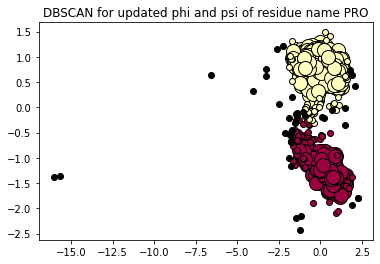

The amount of datapoints for amino acid PRO is 1596
The amount of outliers for amino acid PRO is 41


In [14]:
data_phi_psi = data[['phi_360',
                     'psi_360']]
#get all rows where residue name is 'PRO'
residue_names_PRO = data.loc[data['residue name'].isin(['PRO'])]
#get the corresponding phi & psi values from the PRO rows
data_phi_psi_PRO = residue_names_PRO[['phi_360', 'psi_360']]
#same procedure as before with the rows containing data on residue name 'PRO'
X, labels_true = make_blobs(n_samples=len(data_phi_psi_PRO), centers=data_phi_psi_PRO, cluster_std=0.4)
X = StandardScaler().fit_transform(X)
#DBSCAN , eps = maximum distance between two samples, min_samples = nr of samples in a neighborhood for a point to be considered as a core point.
db = DBSCAN(eps=0.45, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#number of clusters in labels, ignore noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

#Plot the result
#noise in black color
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
print('Estimated number of clusters: %d' % n_clusters)
plt.title("DBSCAN for updated phi and psi of residue name PRO")
plt.show()

print("The amount of datapoints for amino acid PRO is", len(residue_names_PRO))
print("The amount of outliers for amino acid PRO is", n_noise)

In this case it differs with the amount of datapoints we have, here for the amino acid "PRO" we got 1596 datapoints. Since we have less datapoints the variables eps and min_samples needs to be updated with lower values to have a reasonable amount of clusters and good looking scatterplot. We went with the values eps=0.45 and min_samples = 50, which gave us the most reasonable amount of clusters and best looking plot in regards to the amount of outliers that are considered.

**b.	Now use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters**

Estimated number of clusters: 3


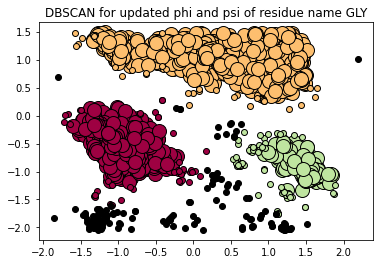

The amount of datapoints for amino acid GLY is 2176
The amount of outliers for amino acid GLY is 166


In [15]:
data_phi_psi = data[['phi_360',
                     'psi_360']]
#get all rows where residue name is 'GLY'
residue_names_GLY = data.loc[data['residue name'].isin(['GLY'])]
#get the corresponding phi & psi values from the GLY rows
data_phi_psi_GLY = residue_names_GLY[['phi_360', 'psi_360']]
#same procedure as before with the rows containing data on residue name 'GLY'
X, labels_true = make_blobs(n_samples=len(data_phi_psi_GLY), centers=data_phi_psi_GLY, cluster_std=0.4)
X = StandardScaler().fit_transform(X)
#min_samples = 60 to have 7 clusters
#DBSCAN , eps = maximum distance between two samples, 
#min_samples = nr of samples in a neighborhood for a point to be considered as a core point.
db = DBSCAN(eps=0.45, min_samples=90).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#number of clusters in labels, ignore noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
#Plot the result
#noise in black color
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
print('Estimated number of clusters: %d' % n_clusters)
plt.title("DBSCAN for updated phi and psi of residue name GLY")
plt.show()
print("The amount of datapoints for amino acid GLY is", len(residue_names_GLY))
print("The amount of outliers for amino acid GLY is", n_noise)

Here we are left with more datapoints than in the case with the amino acid "PRO" but still less than the whole dataset. Here we got 2176 datapoints for the amino acid "GLY", which leads to updating the eps and min_samples value with lower values than the dbscan in question 3 but a little bit higher than in question a) in terms of min_samples at least.

We tested different values for the variables eps and min_samples and concluded that the values eps=0.45 and min_samples=90 (same as before) gave us the most reasonable amount of clusters and best looking plot in regards to the amount of outliers that are considered.

So for a) and b) **we conclude that the parameters(eps & min_sample) get adjusted depending on the size of the dataset.**